Epoch 1/100


c:\Users\Alma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1087.7344
Epoch 2/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0412
Epoch 3/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1334
Epoch 4/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0460
Epoch 5/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1130
Epoch 6/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.5861
Epoch 7/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0726
Epoch 8/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2515
Epoch 9/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1650
Epoch 10/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2248
Epoch 11/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2419
Epoch 12/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0773
Epoch 13/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0474
Epoch 14/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0739
Epoch 15/100
4838/

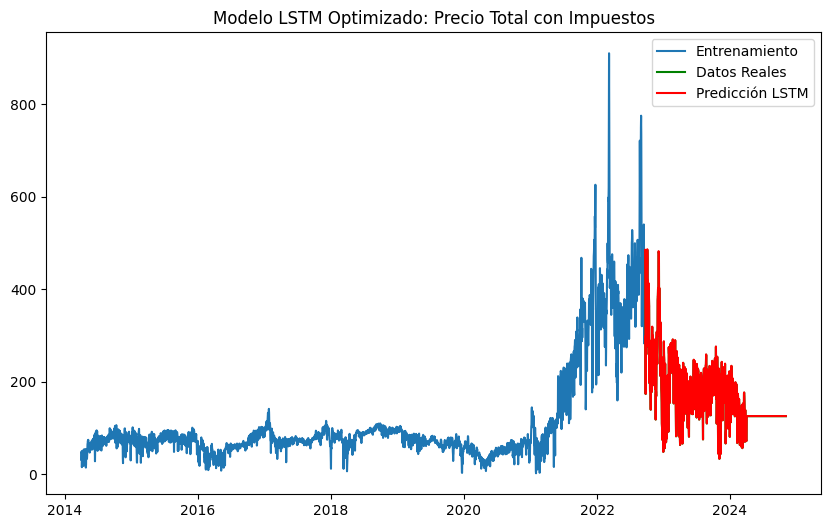

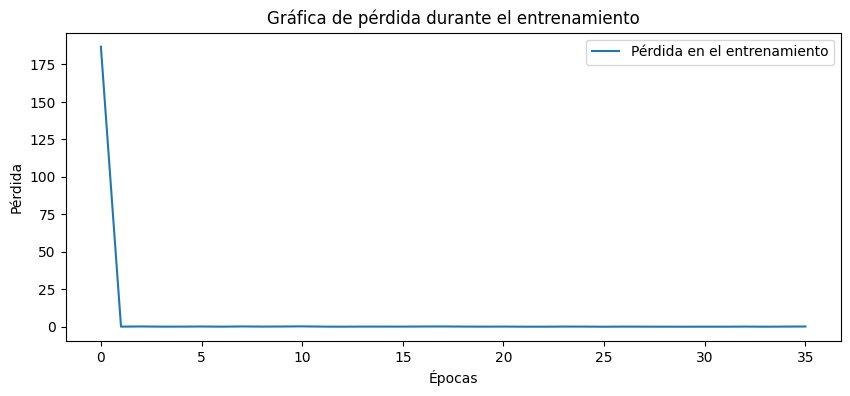

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# *1. Cargar el dataset*
file_path = "../Limpieza_datos/Modelo_Precios_Met_Fest.csv"  
data = pd.read_csv(file_path, delimiter=';')

# *2. Preprocesamiento del dataset*
data['FECHA'] = pd.to_datetime(data['FECHA'])
data = data.sort_values(by='FECHA')

# *Filtrar la serie temporal de interés (Precio total con impuestos (€/MWh))*
serie_temporal = data.set_index('FECHA')['Precio total con impuestos (€/MWh)'].dropna()

# *3. División de los datos en entrenamiento y prueba (80% - 20%)*
train_size = int(len(serie_temporal) * 0.8)
train, test = serie_temporal.iloc[:train_size], serie_temporal.iloc[train_size:]

# *Preparación de los datos para LSTM*
X_train_nn = np.array(train).reshape(-1, 1, 1)  # Formato (samples, timesteps, features)
X_test_nn = np.array(test).reshape(-1, 1, 1)

# *4. Definición del modelo LSTM optimizado*
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(1, 1), return_sequences=True),  # Más neuronas y return_sequences
    tf.keras.layers.LSTM(50, activation='relu'),  # Segunda capa LSTM
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# *Callback para Early Stopping*
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# *5. Entrenamiento del modelo*
history = model_lstm.fit(X_train_nn, train.values, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# *6. Predicciones*
predictions_lstm = model_lstm.predict(X_test_nn).flatten()

# *7. Evaluación del modelo*
rmse_lstm = np.sqrt(mean_squared_error(test, predictions_lstm))
r2_lstm = r2_score(test, predictions_lstm)

print(f"RMSE del Modelo LSTM Optimizado: {rmse_lstm:.2f}")
print(f"R² del Modelo LSTM Optimizado: {r2_lstm:.2f}")

# *8. Visualización de los resultados*
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Entrenamiento')
plt.plot(test.index, test.values, label='Datos Reales', color='green')
plt.plot(test.index, predictions_lstm, label='Predicción LSTM', color='red')
plt.legend()
plt.title('Modelo LSTM Optimizado: Precio Total con Impuestos')
plt.show()

# *9. Visualización de la pérdida*
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Pérdida en el entrenamiento')
plt.title('Gráfica de pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [1]:
# Guardar el modelo en formato .h5
model_lstm.save('../modelos_guardados/AModelo_precios.h5')


NameError: name 'model_lstm' is not defined

Epoch 1/100


c:\Users\Alma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4838/4838 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1177.2281
Epoch 2/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0446
Epoch 3/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1447
Epoch 4/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1233
Epoch 5/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.3080
Epoch 6/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1262
Epoch 7/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2591
Epoch 8/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0518
Epoch 9/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0454
Epoch 10/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1107
Epoch 11/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0860
Epoch 12/100
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0233
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step
RMSE del Modelo LSTM Optimizado: 0.04
R² del Modelo LSTM Optimizado: 1.00


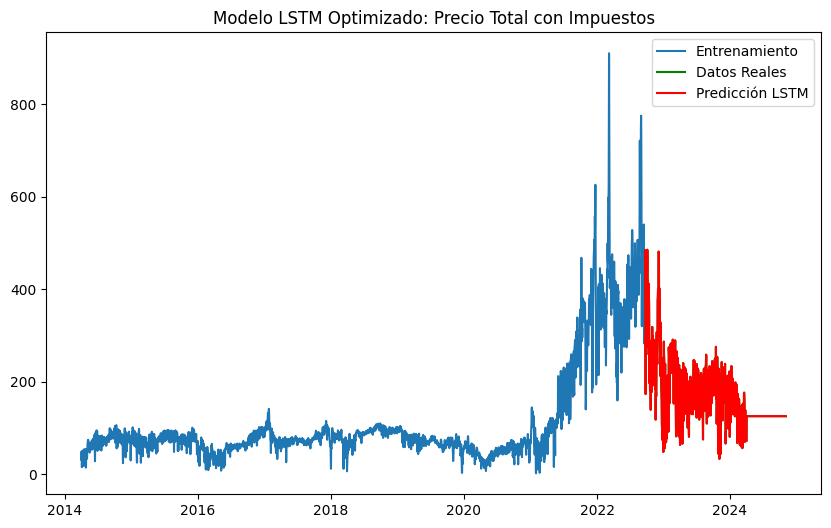

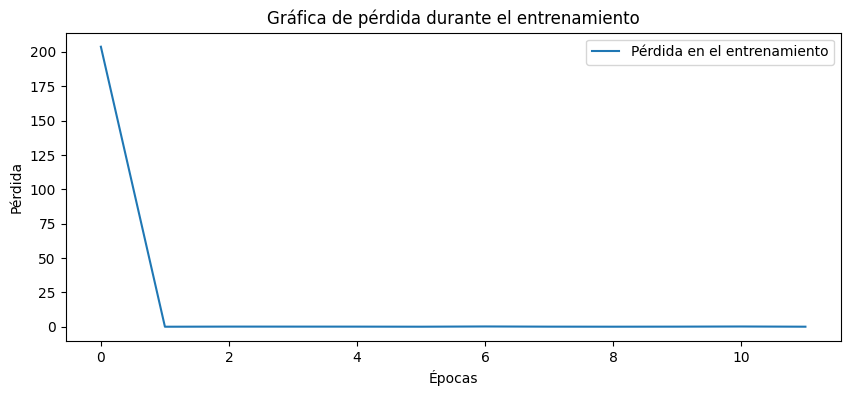

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# *1. Cargar el dataset*
file_path = "../Limpieza_datos/Modelo_Precios_Met_Fest.csv"  
data = pd.read_csv(file_path, delimiter=';')

# *2. Preprocesamiento del dataset*
data['FECHA'] = pd.to_datetime(data['FECHA'])
data = data.sort_values(by='FECHA')

# *Filtrar la serie temporal de interés (Precio total con impuestos (€/MWh))*
serie_temporal = data.set_index('FECHA')['Precio total con impuestos (€/MWh)'].dropna()

# *3. División de los datos en entrenamiento y prueba (80% - 20%)*
train_size = int(len(serie_temporal) * 0.8)
train, test = serie_temporal.iloc[:train_size], serie_temporal.iloc[train_size:]

# *Preparación de los datos para LSTM*
X_train_nn = np.array(train).reshape(-1, 1, 1)  # Formato (samples, timesteps, features)
X_test_nn = np.array(test).reshape(-1, 1, 1)

# *4. Definición del modelo LSTM optimizado*
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(1, 1), return_sequences=True),  # Más neuronas y return_sequences
    tf.keras.layers.LSTM(50, activation='relu'),  # Segunda capa LSTM
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# *Callback para Early Stopping*
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# *5. Entrenamiento del modelo*
history = model_lstm.fit(X_train_nn, train.values, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# *6. Predicciones*
predictions_lstm = model_lstm.predict(X_test_nn).flatten()

# *7. Evaluación del modelo*
rmse_lstm = np.sqrt(mean_squared_error(test, predictions_lstm))
r2_lstm = r2_score(test, predictions_lstm)

print(f"RMSE del Modelo LSTM Optimizado: {rmse_lstm:.2f}")
print(f"R² del Modelo LSTM Optimizado: {r2_lstm:.2f}")

# *8. Visualización de los resultados*
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Entrenamiento')
plt.plot(test.index, test.values, label='Datos Reales', color='green')
plt.plot(test.index, predictions_lstm, label='Predicción LSTM', color='red')
plt.legend()
plt.title('Modelo LSTM Optimizado: Precio Total con Impuestos')
plt.show()

# *9. Visualización de la pérdida*
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Pérdida en el entrenamiento')
plt.title('Gráfica de pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [3]:
model_lstm.save('../modelos_guardados/AModelo_precios.h5')